<a href="https://colab.research.google.com/github/vandana10/deeplearning-using-pytorch/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Pytorch workflow

In [3]:
what_were_covering = {1: "data - prepare and load",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model(inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

In [4]:
import torch
from torch import nn # nn contains all pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__


'2.8.0+cu126'

###Data preparing and loading

data can be ANYTHING!

ML is a game of two parts:
1. get data inot a numerical representation
2. build a model to learn patterns in that numerical representation

We'll use a linear regression formula to make a striaght line with known parameters

In [5]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
len(X), len(y)

(50, 50)

###Splitting data into training and test sets(one of the most imp concepts in ML in general)

Lets create a training and test set with our data

In [7]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:] , y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [8]:
X_train

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])

How might we better visualise our data?

In [9]:
def plot_predictions(train_data=X_train,
                     train_lables=y_train,
                     test_data=X_test,
                     test_Lables=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_lables, c="b", s=4, label="training data")

  plt.scatter(test_data, test_Lables, c="g", s=4, label="test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  plt.legend(prop={"size":14})



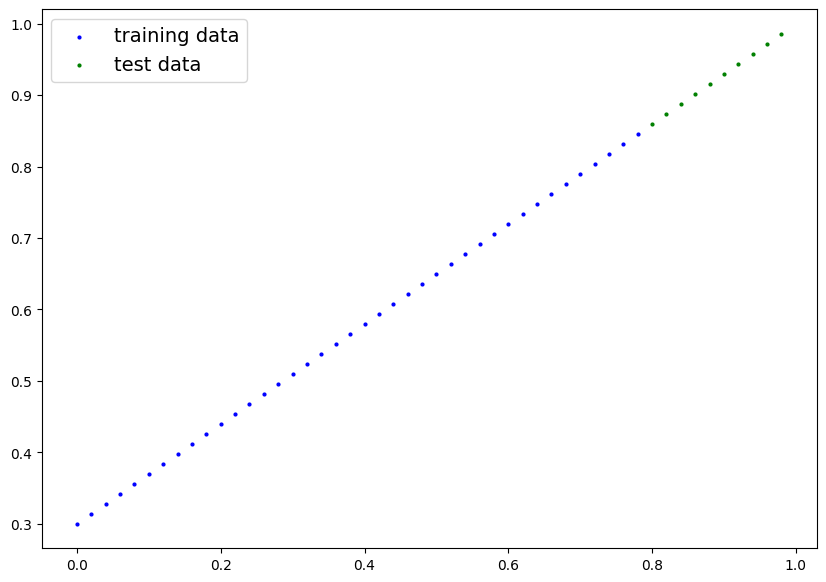

In [10]:
plot_predictions();

## 2. Build model

Our first model

what our model deos?
1. start with random values(weights and bias)
2. look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create data)

how does it do? Through two main algos:
1. Gradient descent
2. Backpropagation

In [29]:
#Create lineat regression model class

class LinearRegressionModel(nn.Module): # almost everything in pytorch inhertis from nn modul
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  #Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: #x is in the input data
    return self.weights * x + self.bias


###PyTorch model building essentials
* torch.nn - contains all of the building for computational graphs
* torch.nn.Parameter - what params should our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.module - base class for all neural network modules
* torch.optim - optimizers of pytorch, they will help with gradient descent
* def forward() - method defines what happens in forward progagation

###Checking the contents of out PyTorch model
use .parameters()

In [30]:
#Create a random seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [20]:
weight,bias

(0.7, 0.3)

In [21]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

### Making prediction using torch.inference.mode()

To check our model's predictive power, lets see how well it predicts 'y test' based on 'X test'

when we pass our data through our model, its going to run it through the
forward method

In [31]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

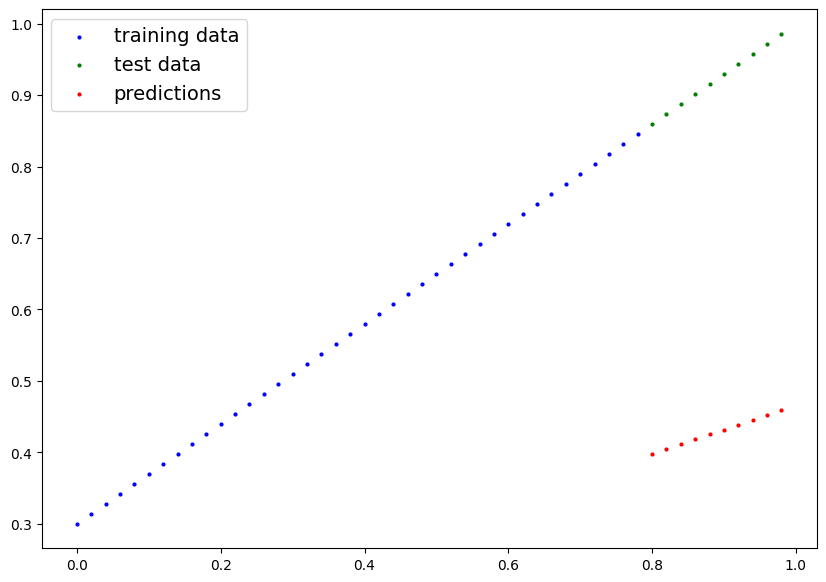

In [32]:
plot_predictions(predictions=y_preds)